In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification

In [4]:
X,Y = make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0)

In [5]:
#Converting 0 Labels to -1
Y[Y==0]=-1 #Broadcasting Technique

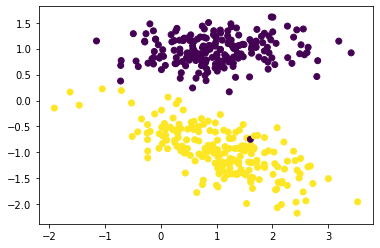

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [7]:
class SVM:
    def __init__(self,C=1.0):
        self.C=C
        self.W=0
        self.b=0
    def hingeloss(self,W,b,X,Y):
        loss=0.0
        loss+=.5*np.dot(W,W.T)
        
        m=X.shape[0]
        
        for i in range(m):
            ti=Y[i]*(np.dot(W,X[i].T)+b)
            loss+=self.C*max(0,1-ti)
        return loss[0][0]
    def fit(self,X,Y,batch_size=100,lr=0.001,maxItr=300):
        no_of_feat=X.shape[1]
        no_of_samples=X.shape[0]
        n=lr
        c=self.C
        
        #Initialise model parameters
        W=np.zeros((1,no_of_feat))
        bias=0
        #Training...
        losses=[]
        for i in range(maxItr):
            l = self.hingeloss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples) # Shuffling Ids
            np.random.shuffle(ids)
            
            #Batch Gradient Descent with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

In [8]:
obj=SVM()

In [9]:
w,bias,losses=obj.fit(X,Y)

In [10]:
print(losses[0])
print(losses[-1])

400.0
14.50615859601033


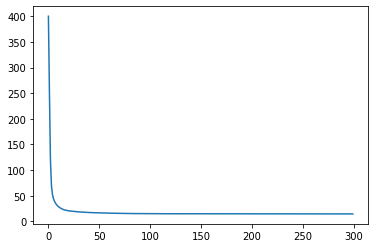

In [11]:
plt.plot(losses)
plt.show()

In [12]:
W,B = obj.W,obj.b
print(W,B)

[[-0.34568718 -2.09358482]] 0.4220000000000003


In [13]:
def plotHyperplane(w1,w2,b):
    
    plt.figure(figsize=(12,12))
    x_1 = np.linspace(-2,4,10) # w1*x1+w2*x2+bias=0
    x_2 = -(w1*x_1+b)/w2 # WT + B = 0
    
    x_p = -(w1*x_1+b+1)/w2 # WT + B = -1 Positive Hyperplane
    x_n = -(w1*x_1+b-1)/w2 # WT + B = +1 Negative Hyperplane
    
    plt.plot(x_1,x_2,label="Hyperplane WX+B=0")
    plt.plot(x_1,x_p,label="+ve Hyperplane WX+B=1")
    plt.plot(x_1,x_n,label="-ve Hyperplane WX+B=-1")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()

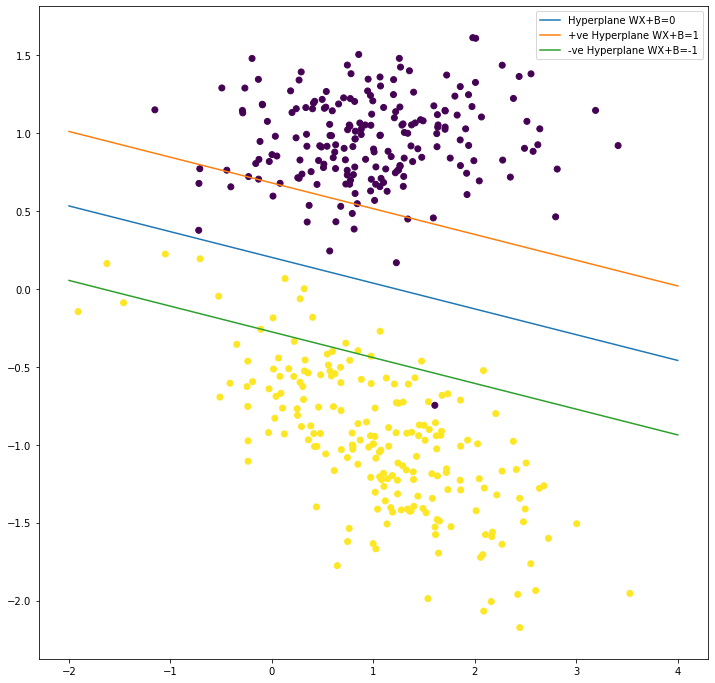

In [14]:
plotHyperplane(W[0,0],W[0,1],B)

In [17]:
obj=SVM(C=1000)            # When Penalty Value is High function tries to minimise error
w,bias,losses=obj.fit(X,Y)

In [18]:
print(losses[0])
print(losses[-1])

400000.0
13077.30255506215


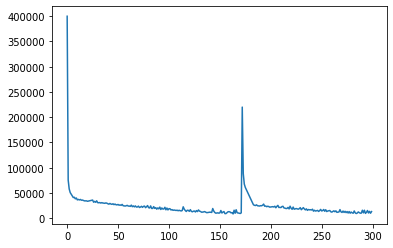

In [19]:
plt.plot(losses)
plt.show()

In [21]:
W,B = obj.W,obj.b
print(W,B)

[[ -3.36957668 -14.27967508]] 3.0


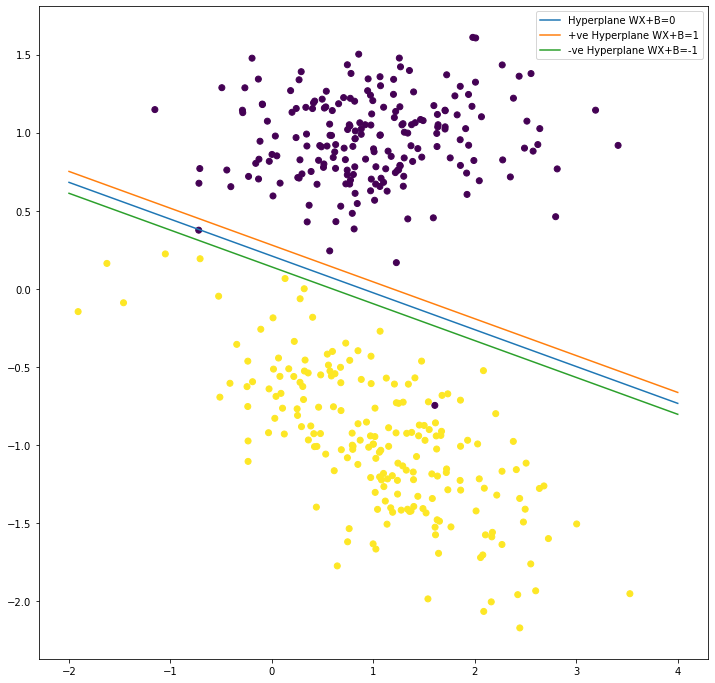

In [22]:
plotHyperplane(W[0,0],W[0,1],B)